In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [60]:
# Leer archivo Excel
xls = pd.ExcelFile('Equivalente_electrico.xlsx')
wdata = pd.read_excel(xls, sheet_name=0, usecols=('t','T')).to_numpy()
idata = pd.read_excel(xls, sheet_name=1, usecols=('t','T')).to_numpy()

# C a K
wdata[:,1] = [y+273.15 for y in wdata[:,1]]
idata[:,1] = [y+273.15 for y in idata[:,1]]

### Equivalente eléctrico y calor latente

Primero las regresiones:

In [65]:
# Equivalente eléctrico del calor
def linf(x,a,b):   return a*x+b
wfit, wcov = curve_fit(linf, wdata[:,0],wdata[:,1])
wx = range(wdata[0,0],wdata[-1,0])

print(f'Equivalente eléctrico: {wfit[0]:.6f}x + {wfit[1]:.3f}')


# Calor latente de fusión
def linf(x,a,b):   return a*x+b
ifit, icov = curve_fit(linf, idata[6:,0],idata[6:,1])
ix = range(idata[4,0],idata[-1,0])

print(f'Calor latente de fusión: {ifit[0]:.6f}x + {ifit[1]:.3f}')


Equivalente eléctrico: 0.007935x + 294.854
Calor latente de fusión: 0.014615x + 265.471


In [62]:
def graph(xdom,data,fit,title):
    fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))

    ax1.scatter(data[:,0],data[:,1], marker='o', color='xkcd:orange', linewidth=1, zorder=2, label='Datos')
    ax1.plot(xdom, linf(xdom,fit[0],fit[1]), color='xkcd:bright blue', linewidth=1.5, zorder=1, label='Ajuste')

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(ls='--', zorder=0)
    ax1.set_title(title)
    ax1.set_ylabel("T (K)")
    ax1.set_xlabel("t (s)")
    ax1.legend()

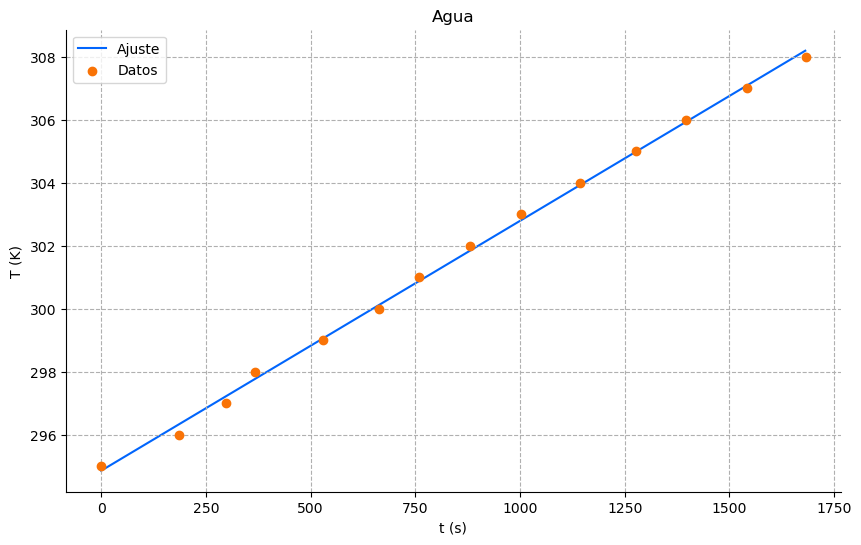

In [63]:
graph(wx,wdata,wfit,'Agua')

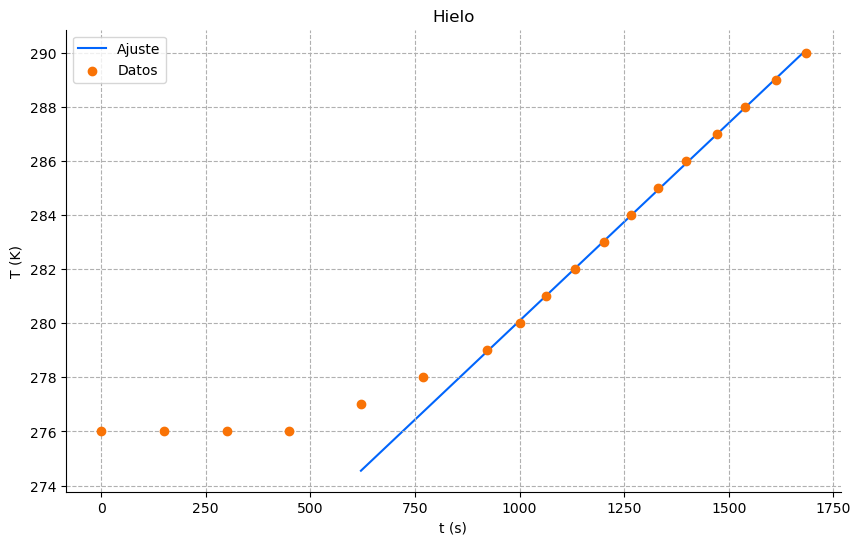

In [66]:
graph(ix,idata,ifit,'Hielo')